In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
from utils import *

In [3]:
from darknet import Darknet

In [4]:
cfg_file = 'cfg/yolov3.cfg'

In [5]:
weight_file = 'weights/yolov3.weights'

In [6]:
namesfile = 'data/coco.names'

In [7]:
model = Darknet(cfg_file)

In [8]:
model.load_weights(weight_file)

In [9]:
class_names = load_class_names(namesfile)

In [10]:
class_names

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [11]:
len(class_names)

80

In [12]:
model.print_network()

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64
    4 shortcut 1
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128
    8 shortcut 5
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128
   11 shortcut 8
   12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256
   13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128
   14 conv    256  3 x 3 / 1    52 x  52 x 128   ->    52 x  52 x 256
   15 shortcut 12
   16 conv    128  1 x 1

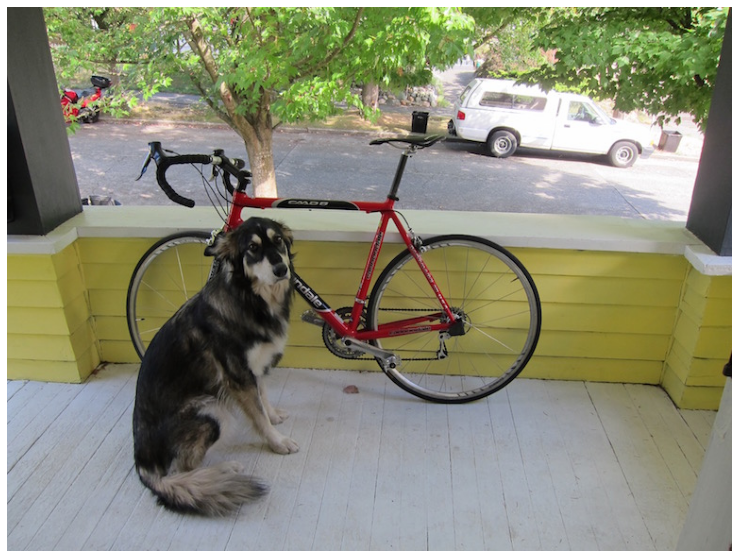

In [13]:
plt.figure(figsize=[15,10])

img_data = cv2.imread('./images/dog.jpg')

img = cv2.cvtColor(img_data, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off')
plt.show()

In [14]:
#Non-Maximal Suppression (NMS)
#all predicted bounding boxes that have a detection probability less than given NMS threshold value will be removed

nms_thresh = 0.6

In [15]:
#select the bounding boxes with the highest detection probability and eliminate all the bounding boxes whose 
#Intersection Over Union (IOU) value is higher than a given IOU threshold.

iou_thresh = 0.4

In [28]:
plt.rcParams['figure.figsize'] = [24.0,14.0]

img_data = cv2.imread('./images/dog.jpg')

img = cv2.cvtColor(img_data, cv2.COLOR_BGR2RGB)

resized_img = cv2.resize(img, (model.width, model.height))

boxes = detect_objects(model, resized_img, iou_thresh, nms_thresh)



It took 1.102 seconds to detect the objects in the image.

Number of Objects Detected: 3 



In [29]:
print_objects(boxes, class_names)

Objects Found and Confidence Level:

1. dog: 0.999997
2. truck: 0.991655
3. bicycle: 0.999998


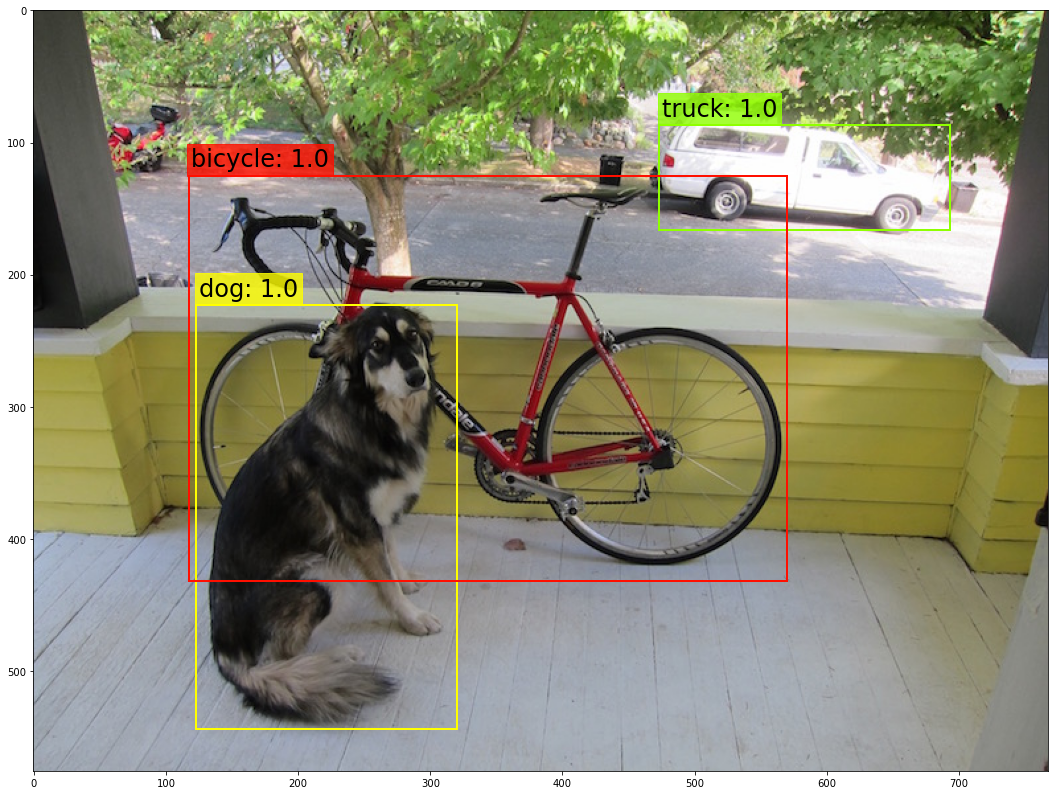

In [30]:
plot_boxes(img, boxes,class_names, plot_labels= True)

In [31]:
plt.rcParams['figure.figsize'] = [24.0,14.0]

img_data = cv2.imread('./images/city_scene.jpg')

img = cv2.cvtColor(img_data, cv2.COLOR_BGR2RGB)

resized_img = cv2.resize(img, (model.width, model.height))

boxes = detect_objects(model, resized_img, iou_thresh, nms_thresh)



It took 1.240 seconds to detect the objects in the image.

Number of Objects Detected: 28 



In [32]:
print_objects(boxes, class_names)

Objects Found and Confidence Level:

1. person: 0.999996
2. person: 1.000000
3. car: 0.707238
4. truck: 0.933031
5. car: 0.658085
6. truck: 0.666981
7. person: 1.000000
8. traffic light: 1.000000
9. person: 1.000000
10. car: 0.997369
11. bus: 0.998023
12. person: 1.000000
13. person: 1.000000
14. person: 1.000000
15. person: 1.000000
16. person: 1.000000
17. traffic light: 1.000000
18. traffic light: 1.000000
19. handbag: 0.997282
20. traffic light: 1.000000
21. car: 0.989741
22. traffic light: 1.000000
23. traffic light: 0.999999
24. person: 0.999999
25. truck: 0.715037
26. traffic light: 1.000000
27. person: 0.999993
28. person: 0.999996


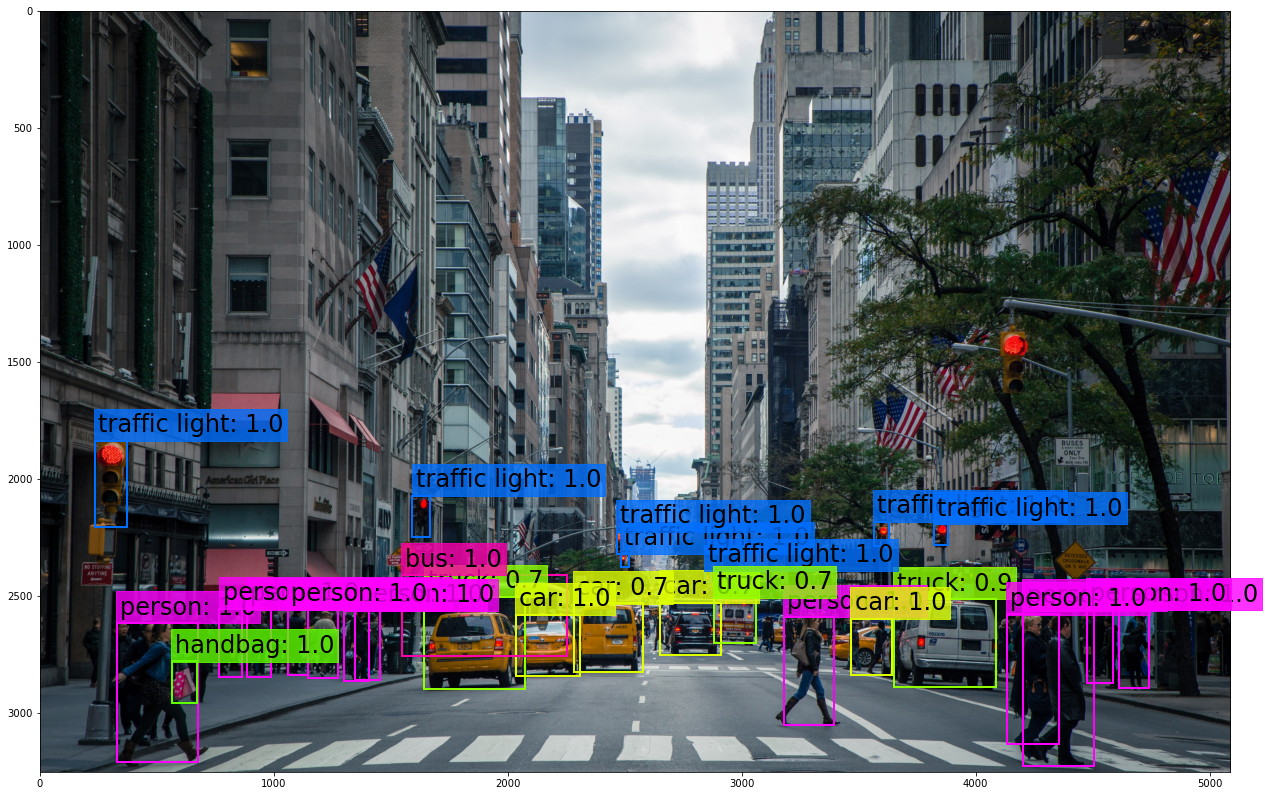

In [33]:
plot_boxes(img, boxes, class_names, plot_labels=True)